In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Sigmoid
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

ImportError: cannot import name 'Sigmoid' from 'tensorflow.keras.layers' (/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/_api/v1/keras/layers/__init__.py)

In [3]:
X, y = load_breast_cancer(return_X_y=True)


In [4]:
print(X.shape, y.shape)

(569, 30) (569,)


In [11]:
X_t = pd.DataFrame(X)

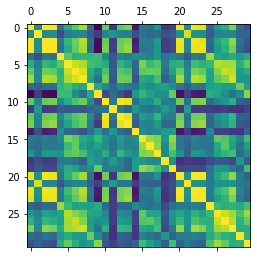

In [15]:
plt.matshow(X_t.corr())
plt.show()

In [18]:
# Normalize trainand test input
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(X)


In [26]:
y.shape

(569,)

In [37]:
#Instantiate the model
K.clear_session() # ONLY for jupyter to wipe out all compilations

model = Sequential([
    Dense(5, input_shape = (30,), activation= 'relu'), # input shape of the SINGLE datapoint after flattening
    #Dense(10, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
]
)

In [38]:
#Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
cancer_fit = model.fit(x_train_sc, y, batch_size=10, epochs =150, validation_split = 0.3) #batch size for taking how many datapoint

Train on 398 samples, validate on 171 samples
Epoch 1/150
398/398 [==============================] - 0s 724us/sample - loss: 0.6801 - acc: 0.4573 - val_loss: 0.6898 - val_acc: 0.3860
Epoch 2/150
398/398 [==============================] - 0s 178us/sample - loss: 0.6434 - acc: 0.7588 - val_loss: 0.6445 - val_acc: 0.7251
Epoch 3/150
398/398 [==============================] - 0s 177us/sample - loss: 0.6038 - acc: 0.8894 - val_loss: 0.5973 - val_acc: 0.8538
Epoch 4/150
398/398 [==============================] - 0s 167us/sample - loss: 0.5637 - acc: 0.9070 - val_loss: 0.5550 - val_acc: 0.8713
Epoch 5/150
398/398 [==============================] - 0s 156us/sample - loss: 0.5236 - acc: 0.9221 - val_loss: 0.5217 - val_acc: 0.8713
Epoch 6/150
398/398 [==============================] - 0s 168us/sample - loss: 0.4856 - acc: 0.9221 - val_loss: 0.4903 - val_acc: 0.8713
Epoch 7/150
398/398 [==============================] - 0s 170us/sample - loss: 0.4506 - acc: 0.9221 - val_loss: 0.4508 - val_acc: 0.

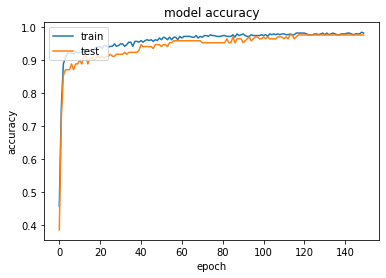

In [40]:
# summarize history for accuracy
plt.plot(cancer_fit.history['acc'])
plt.plot(cancer_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

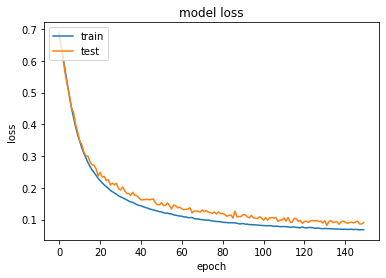

In [41]:
plt.plot(cancer_fit.history['loss'])
plt.plot(cancer_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
model.predict(x_train_sc, batch_size=10)
probability_model = Sequential([model, Softmax()])

In [46]:
probability_model

In [52]:
predictions = probability_model.predict(x_train_sc, batch_size=10)

In [53]:
np.argmax(predictions)

0

In [54]:
print(y,predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 